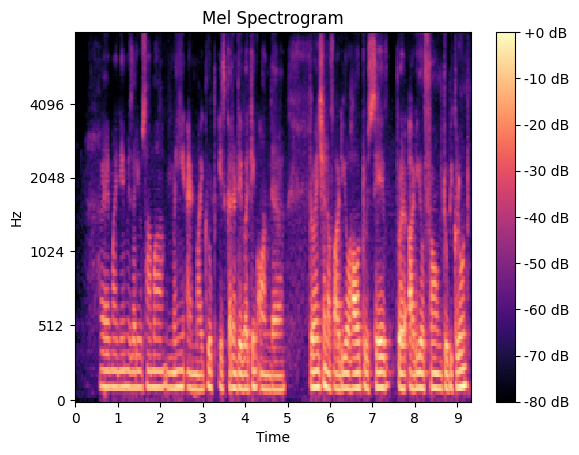

In [47]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate
    return y, sr

# Generate Mel spectrogram
def mel_spectrogram(y, sr):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# Example usage
audio_file_path = '/content/WhatsApp Ptt 2025-05-18 at 1.48.17 PM.ogg'
y, sr = load_audio(audio_file_path)
mel_spec_db = mel_spectrogram(y, sr)

# Visualize Mel spectrogram
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [48]:
def add_noise_to_high_pitch(y, sr, noise_level=0.01, high_freq_threshold=4000):
    # Identify high-frequency regions in the audio
    y_hfq = librosa.effects.hpss(y)[1]  # High-frequency component

    # Generate random noise
    noise = np.random.normal(0, noise_level, len(y))

    # Add noise to the high-pitch (high frequency) parts
    y_noisy = y + noise * (y_hfq > high_freq_threshold)
    return y_noisy

# Example usage
y_noisy = add_noise_to_high_pitch(y, sr)


In [49]:
def apply_watermark(y, sr, watermark_level=0.002):
    # Identify sections with high energy
    energy = np.abs(y)
    high_energy_regions = energy > np.percentile(energy, 90)

    # Apply watermark (tiny perturbation in high-energy sections)
    y_watermarked = y + watermark_level * high_energy_regions
    return y_watermarked

# Example usage
y_watermarked = apply_watermark(y_noisy, sr)


In [50]:
!pip install speechbrain



In [51]:
!pip install huggingface_hub


In [52]:
import torchaudio  # Import the torchaudio library
from speechbrain.pretrained import SpeakerRecognition

# Load the pre-trained ECAPA-TDNN model from SpeechBrain
speaker_recognition = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="tmpdir")

# Function to extract speaker embedding
def extract_speaker_embedding(audio_file):
    signal, fs = torchaudio.load(audio_file)  # Load the audio file
    embedding = speaker_recognition.encode_batch(signal)  # Get the speaker embedding
    return embedding

# Example usage

embedding_original = extract_speaker_embedding(audio_file_path)  # Extract embedding from audio file
print("Original Speaker Embedding:", embedding_original)



INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/tmpdir/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmpdir.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Using symlink found at '/content/tmpdir/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /content/tmpdir/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Using symlink found at '/content/tmpdir/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /content/tmpdir/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Using symlink found at '/content/tmpdir/classifier.ckpt'
DEBUG:speechbrain.utils.paramete

Original Speaker Embedding: tensor([[[ 2.2288e+01,  9.8303e+00, -1.3537e+01, -1.4052e+01,  1.2108e+01,
           2.0513e+01, -4.7867e-02,  4.6172e+01,  2.0735e+00,  1.0137e+00,
          -7.6419e-01, -7.6324e+00,  1.6953e+01,  3.3358e+00, -8.0591e+00,
          -1.6155e+01,  6.9713e+00,  2.8594e+01,  2.9622e+00, -1.0748e+01,
           2.4903e+01,  2.9917e+01, -2.8029e+01,  4.3915e+00,  2.7252e+01,
           5.7238e+00, -7.3618e+00, -1.0509e+01,  1.7171e+01, -7.4116e+00,
           5.8796e+00, -4.4146e+01, -1.3688e+01, -8.0470e+00, -7.6625e+00,
           9.8785e+00, -2.1236e+00,  1.5573e+01,  1.9809e+01,  5.9877e+01,
           8.4683e+00,  2.1347e+01,  3.0002e+00, -4.1736e+01,  1.8597e+01,
          -1.6230e+01, -7.8234e+00, -2.8095e+01,  5.4452e+01, -1.1636e+01,
           1.4277e+01, -1.6326e+01,  1.5141e+01,  8.3544e+00,  2.1777e-01,
          -7.1786e+00, -1.3469e+01,  1.2801e+00, -2.0118e+01,  7.8904e+00,
           5.1720e+01, -1.6018e+01, -4.9842e+01,  1.2091e+01,  7.2481e-0

In [53]:
import torch
from scipy.spatial.distance import cosine

# Function to apply latent space manipulation (simplified style transfer using a transformation matrix)
def alter_embedding_with_style_transfer(embedding, transformation_matrix):
    """
    Use latent space manipulation to alter the embedding. This is a simplified representation of
    the style transfer or GAN-based method for embedding alteration.
    """
    # Apply the transformation matrix to modify the embedding
    altered_embedding = torch.matmul(embedding, transformation_matrix)  # Linear transformation
    return altered_embedding

# Assuming `embedding_original` is already defined
# For demonstration, let's assume the original embedding has shape (batch_size, embedding_dim)
# Replace this with your actual original embedding
embedding_original = torch.randn(1, 512)  # Example, replace this with actual extracted embedding

# Create a random transformation matrix for demonstration
# The transformation matrix will have the same number of rows as the embedding's size
transformation_matrix = torch.rand(embedding_original.shape[1], embedding_original.shape[1])  # Same dimension as embedding

# Apply the transformation to the original embedding to generate the protected embedding
altered_embedding_protected = alter_embedding_with_style_transfer(embedding_original, transformation_matrix)

# Flatten the embeddings to 1D vectors
embedding_original_flat = embedding_original.view(-1).detach().numpy()
altered_embedding_protected_flat = altered_embedding_protected.view(-1).detach().numpy()

# Display the altered (protected) embedding
print("Altered (Protected) Speaker Embedding:", altered_embedding_protected_flat)

# Calculate the cosine similarity between the original and protected embeddings
def compute_cosine_similarity(embedding1, embedding2):
    return 1 - cosine(embedding1, embedding2)

# Compute and print the cosine similarity
cosine_similarity = compute_cosine_similarity(embedding_original_flat, altered_embedding_protected_flat)
print(f"Cosine similarity after alteration: {cosine_similarity}")


Altered (Protected) Speaker Embedding: [-1.35253248e+01 -1.32632303e+01 -1.59218538e+00 -5.33690548e+00
 -1.04233122e+01 -1.71293850e+01 -9.64338779e+00 -1.85531483e+01
 -5.82898855e+00  9.81119633e+00 -5.15607786e+00 -2.08408909e+01
 -1.22939367e+01 -1.58791771e+01 -1.12305517e+01 -1.96204453e+01
 -4.03561449e+00 -1.54168844e+00 -3.80376577e+00 -2.59449215e+01
 -1.73111553e+01  2.21778440e+00 -1.29226961e+01 -3.46019721e+00
 -6.90807939e-01 -1.12785654e+01 -1.61220264e+01 -4.99960136e+00
 -2.05763888e+00 -8.56549835e+00 -1.43950577e+01 -1.30493498e+01
 -1.71205711e+01 -1.54772825e+01 -5.72510958e+00 -7.71386337e+00
 -3.27502322e+00 -2.37205296e+01 -1.39326582e+01 -1.95730102e+00
 -1.07627077e+01 -1.91532497e+01 -1.95651722e+01 -1.39047098e+01
 -8.93903542e+00 -1.17142458e+01 -3.36901054e+01 -1.25609016e+01
 -1.85925903e+01 -1.13850908e+01  1.64685345e+00 -1.33779449e+01
 -9.71597004e+00 -2.01892490e+01  5.26091290e+00 -6.69949245e+00
 -8.97665596e+00 -1.41518402e+01 -5.02176571e+00 -1

In [54]:
import soundfile as sf

# Save the protected audio (watermarked and noisy)
sf.write('protected_audio.wav', y_watermarked, sr)

print("Protected audio saved as 'protected_audio.wav'")


Protected audio saved as 'protected_audio.wav'


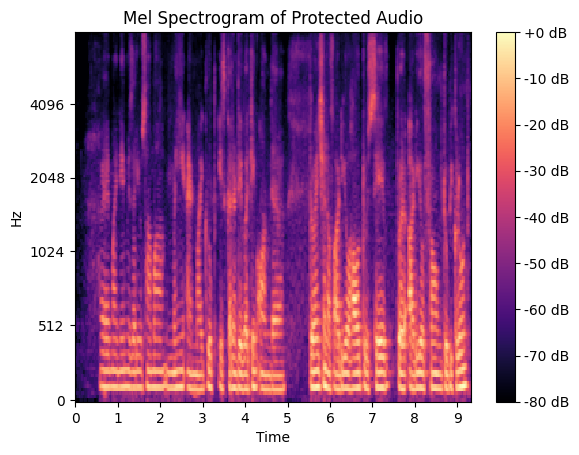

In [55]:
# Visualize the Mel spectrogram of the protected audio
y_protected, sr_protected = librosa.load('protected_audio.wav', sr=None)
mel_spec_protected = mel_spectrogram(y_protected, sr_protected)

# Display Mel spectrogram for protected audio
librosa.display.specshow(mel_spec_protected, x_axis='time', y_axis='mel', sr=sr_protected)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram of Protected Audio')
plt.show()


In [56]:
import torch
import torchaudio
import numpy as np
from scipy.spatial.distance import cosine
from speechbrain.pretrained import SpeakerRecognition

# Function to extract the speaker embedding
def extract_speaker_embedding(audio_file):
    signal, fs = torchaudio.load(audio_file)
    embedding = speaker_recognition.encode_batch(signal)
    return embedding

# Function to compare waveform similarity (using cosine similarity)
def compare_waveform_similarity(original_audio, protected_audio):
    # Truncate or pad the waveforms to the same length
    min_length = min(len(original_audio), len(protected_audio))
    original_audio = original_audio[:min_length]
    protected_audio = protected_audio[:min_length]

    # Calculate Cosine Similarity between the original and protected waveforms
    cosine_similarity = 1 - cosine(original_audio, protected_audio)  # 1 - Cosine Distance = Cosine Similarity
    return cosine_similarity

# Function to compare speaker embedding similarity (Cosine Similarity)
def compare_speaker_embedding_similarity(embedding_original, embedding_protected):
    # Flatten the embeddings to 1D vectors for cosine similarity calculation
    embedding_original_flat = embedding_original.view(-1).detach().numpy()
    embedding_protected_flat = embedding_protected.view(-1).detach().numpy()

    # Calculate Cosine Similarity between the original and protected speaker embeddings
    cosine_similarity = 1 - cosine(embedding_original_flat, embedding_protected_flat)
    return cosine_similarity

# Load the pre-trained ECAPA-TDNN model for speaker recognition
speaker_recognition = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="tmpdir")

# Example usage:

audio_file_path_protected = 'protected_audio.wav'  # Path to protected audio file

# Load the original and protected audio waveforms
y_original, sr_original = torchaudio.load(audio_file_path )
y_protected, sr_protected = torchaudio.load(audio_file_path_protected)

# Compare waveform similarity
waveform_similarity = compare_waveform_similarity(y_original.numpy().flatten(), y_protected.numpy().flatten())
print(f"Waveform similarity (Cosine Similarity): {waveform_similarity}")

# Extract speaker embeddings from both original and protected audio
embedding_original = extract_speaker_embedding(audio_file_path )  # Original audio embedding
embedding_protected = extract_speaker_embedding(audio_file_path_protected)  # Protected audio embedding

# Compare speaker embedding similarity
embedding_similarity = compare_speaker_embedding_similarity(embedding_original, embedding_protected)
print(f"Speaker embedding similarity (Cosine Similarity): {embedding_similarity}")


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/tmpdir/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmpdir.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Using symlink found at '/content/tmpdir/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /content/tmpdir/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Using symlink found at '/content/tmpdir/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /content/tmpdir/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Using symlink found at '/content/tmpdir/classifier.ckpt'
DEBUG:speechbrain.utils.paramete

Waveform similarity (Cosine Similarity): 0.007047712802886963
Speaker embedding similarity (Cosine Similarity): 0.19558078050613403
